IMPORTS

In [87]:
import collections
from collections import defaultdict
import os
import textract

import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import yake

from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image

import string
import sys

import pandas as pd
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
from scipy.spatial.distance import cosine

from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


COUNTING FILES

In [73]:
path = "../tp4/data_bis/"
files = []
for name in os.listdir(path):
    if name.endswith(".txt"):
        files.append(name)
files = sorted(files)
len(files)

1000

FILES NAMES EXPLORER: EXAMPLE ON FIRST FILE

In [74]:
#fileName model
fileName = files [0]
type(fileName)

str

In [75]:
#split_method
fileName_split = fileName.split('_')
fileName_split

['KB', 'JB1051', '1927-03-17', '01-00004.txt']

In [76]:
#date_path
date = fileName_split[2]

#year_path
date_split = date.split('-')
year = date_split[0]

#convert year into decades
year[:3]
year[-1]
year[:3] + '0s'

'1920s'

SPLITTING FILES NAMES TO ACCESS NEWSLETTER NAME & DATE

In [78]:
all_years = [str(year) for year in range(1831, 1971)]

In [79]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_year = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_year [year] += 1
    else:
        print(f"Anomalous file: {f}")

COUNTING FILES BY NEWSLETTER NAME

In [80]:
#stat by newsletterName
print(f"Ce corpus comprend:")
print(f"- {count_newspapers ['JB838']} exemplaires du journal Le Soir")
print(f"- {count_newspapers ['JB638']} exemplaires de La Meuse")
print(f"- {count_newspapers ['JB427']} exemplaires de La Libre Belgique")
print(f"- {count_newspapers ['JB555']} exemplaires de l'Indépendance Belge")
print(f"- {count_newspapers ['JB572']} exemplaires du Journal de Charleroi")
print(f"- {count_newspapers ['JB1051']} exemplaires du journal Le Drapeau rouge")
print(f"- {count_newspapers ['JB567']} exemplaires du Journal de Bruxelles")
print(f"- {count_newspapers ['JB729']} exemplaires du Vingtième Siècle")
print(f"- {count_newspapers ['JB773']} exemplaires du journal Vers l'Avenir")
print(f"- {count_newspapers ['JB837']} exemplaires du journal Le Peuple")
print(f"- {count_newspapers ['JB421']} exemplaires de l'Avenir du Luxembourg")
print(f"- {count_newspapers ['JB685']} exemplaires du journal Le Petit Bleu")
print(f"- {count_newspapers ['JB555A']} exemplaires de L'Indépendance Belge (édité en Angleterre)")

Ce corpus comprend:
- 696 exemplaires du journal Le Soir
- 76 exemplaires de La Meuse
- 49 exemplaires de La Libre Belgique
- 25 exemplaires de l'Indépendance Belge
- 20 exemplaires du Journal de Charleroi
- 50 exemplaires du journal Le Drapeau rouge
- 14 exemplaires du Journal de Bruxelles
- 15 exemplaires du Vingtième Siècle
- 21 exemplaires du journal Vers l'Avenir
- 18 exemplaires du journal Le Peuple
- 13 exemplaires de l'Avenir du Luxembourg
- 3 exemplaires du journal Le Petit Bleu
- 0 exemplaires de L'Indépendance Belge (édité en Angleterre)


COUNTING FILES BY DECADES

In [81]:
#stat by decades
print(f"Ce corpus comprend:")
print(f"- {count_decade['1830s']} fichiers pour la décennie 1830s")
print(f"- {count_decade['1840s']} fichiers pour la décennie 1840s")
print(f"- {count_decade['1850s']} fichiers pour la décennie 1850s")
print(f"- {count_decade['1860s']} fichiers pour la décennie 1860s")
print(f"- {count_decade['1870s']} fichiers pour la décennie 1870s")
print(f"- {count_decade['1880s']} fichiers pour la décennie 1880s")
print(f"- {count_decade['1890s']} fichiers pour la décennie 1890s")
print(f"- {count_decade['1900s']} fichiers pour la décennie 1900s")
print(f"- {count_decade['1910s']} fichiers pour la décennie 1910s")
print(f"- {count_decade['1920s']} fichiers pour la décennie 1920s")
print(f"- {count_decade['1930s']} fichiers pour la décennie 1930s")
print(f"- {count_decade['1940s']} fichiers pour la décennie 1940s")
print(f"- {count_decade['1950s']} fichiers pour la décennie 1950s")
print(f"- {count_decade['1960s']} fichiers pour la décennie 1960s")
print(f"- {count_decade['1970s']} fichiers pour la décennie 1970s")

missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Ce corpus comprend:
- 0 fichiers pour la décennie 1830s
- 0 fichiers pour la décennie 1840s
- 0 fichiers pour la décennie 1850s
- 3 fichiers pour la décennie 1860s
- 3 fichiers pour la décennie 1870s
- 13 fichiers pour la décennie 1880s
- 30 fichiers pour la décennie 1890s
- 54 fichiers pour la décennie 1900s
- 37 fichiers pour la décennie 1910s
- 67 fichiers pour la décennie 1920s
- 109 fichiers pour la décennie 1930s
- 71 fichiers pour la décennie 1940s
- 147 fichiers pour la décennie 1950s
- 448 fichiers pour la décennie 1960s
- 18 fichiers pour la décennie 1970s
Années manquantes: 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1861, 1862, 1864, 1865, 1866, 1868, 1869, 1870, 1871, 1872, 1873, 1876, 1877, 1878, 1883, 1884, 1885, 1887, 1915, 1916, 1917, 1918, 1941, 1951


EXPLORING DATAS WITH SIMPLE BARCHART

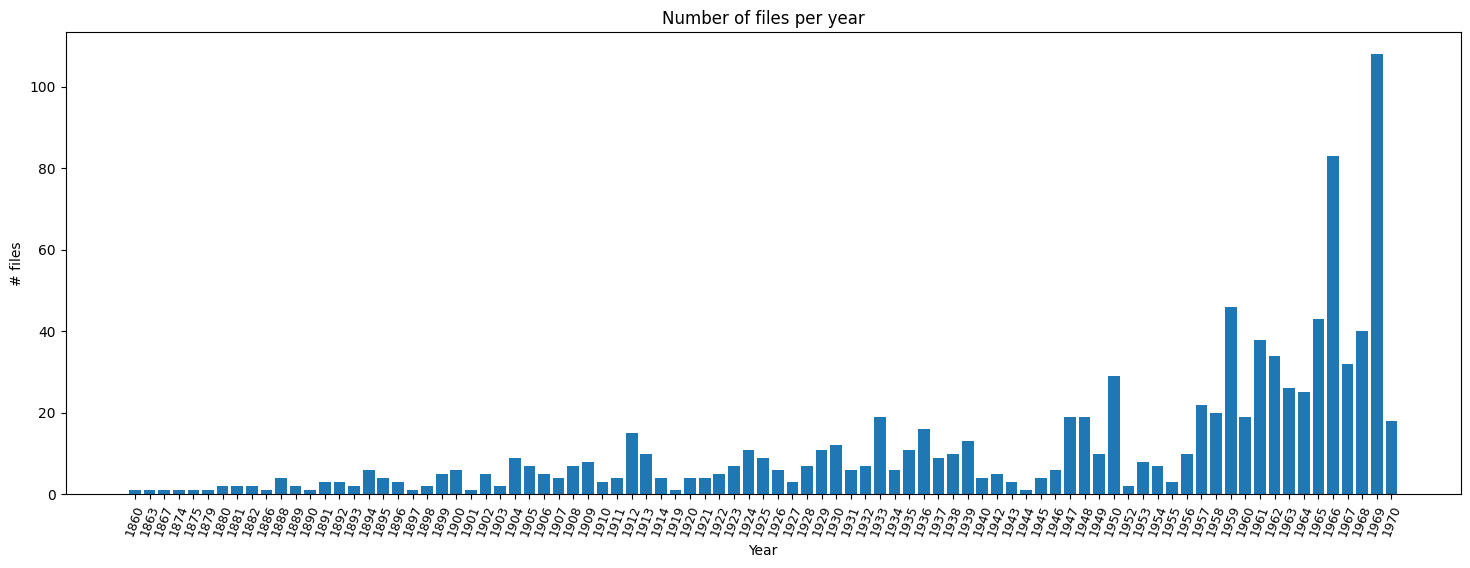

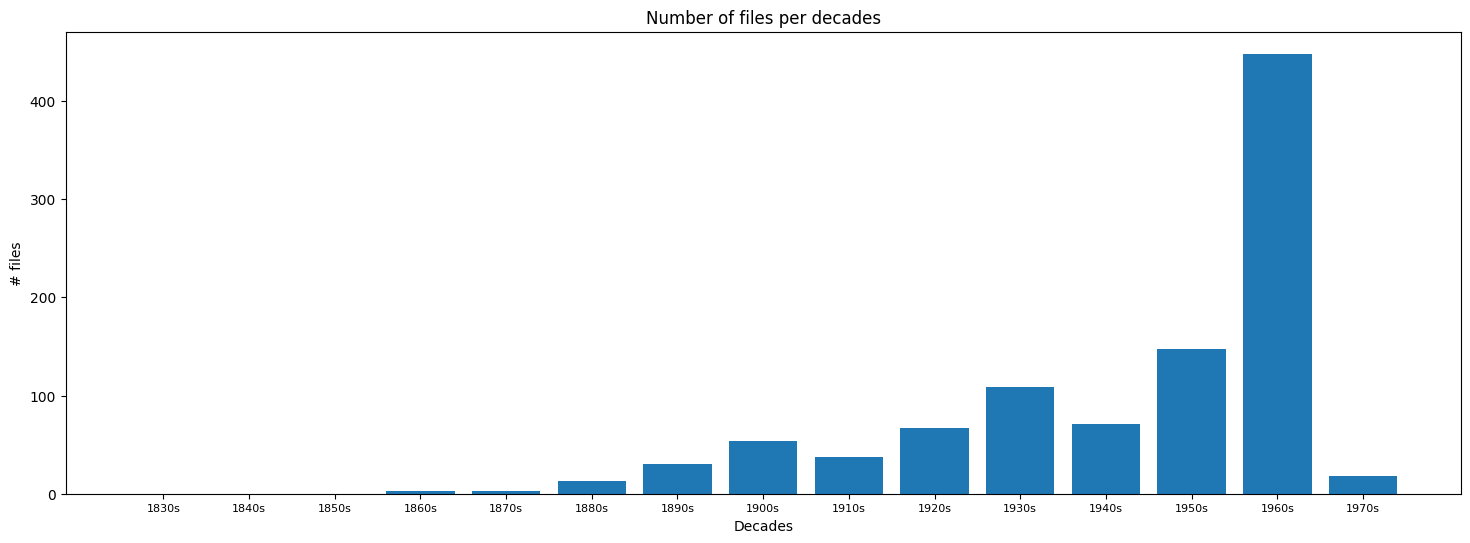

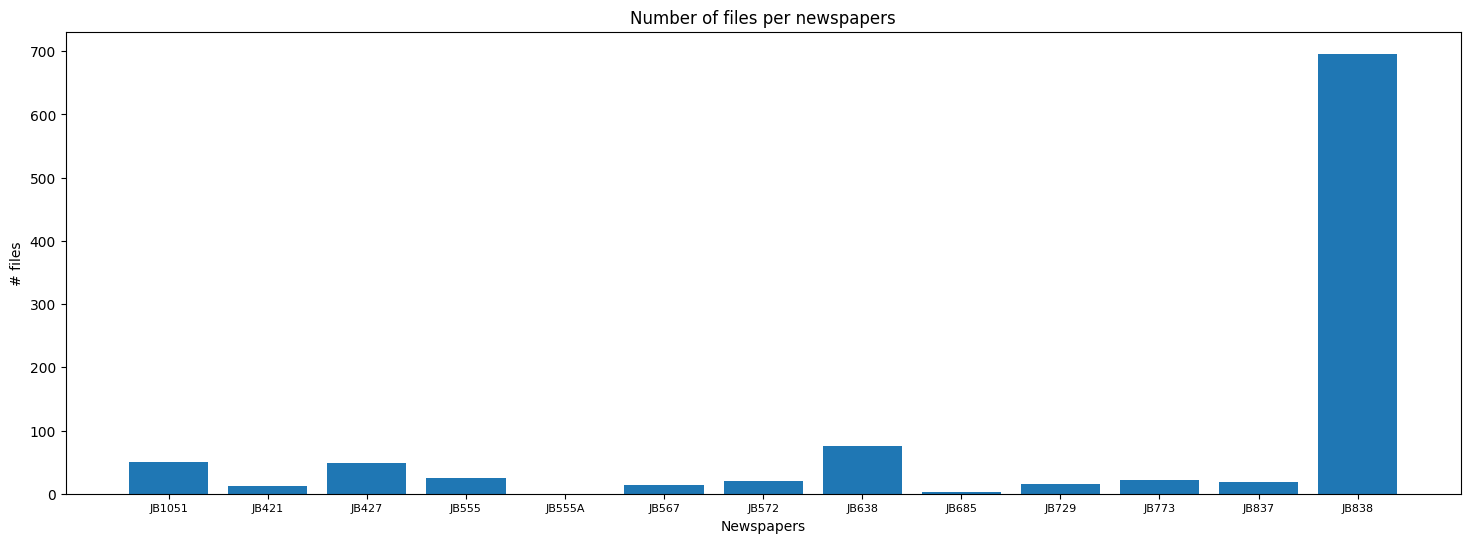

In [82]:
plt.rcParams['figure.figsize'] = [18, 6] # Change size of all graphics

ordered_years = sorted(count_year.keys())
ordered_count_years = [count_year[year] for year in ordered_years]

index = np.arange(len(count_year))
plt.bar(index, ordered_count_years)
plt.xlabel('Year')
plt.ylabel('# files')
plt.xticks(index, ordered_years, fontsize=9, rotation=70)
plt.title('Number of files per year')
plt.show()

ordered_decades = sorted(count_decade.keys())
ordered_count_decades = [count_decade[decade] for decade in ordered_decades]

index = np.arange(len(count_decade))
plt.bar(index, ordered_count_decades)
plt.xlabel('Decades')
plt.ylabel('# files')
plt.xticks(index, ordered_decades, fontsize=8, rotation=0)
plt.title('Number of files per decades')
plt.show()

ordered_newspapers = sorted(count_newspapers.keys())
ordered_count_newspapers = [count_newspapers[newspaper] for newspaper in ordered_newspapers]

index = np.arange(len(count_newspapers))
plt.bar(index, ordered_count_newspapers)
plt.xlabel('Newspapers')
plt.ylabel('# files')
plt.xticks(index, ordered_newspapers, fontsize=8, rotation=0)
plt.title('Number of files per newspapers')
plt.show()

PUTTING THE FILES IN A BIG txt CORPUS CALLED "all.txt"

In [39]:
!cat ../tp4/data_bis/*.txt > ../tp4/all/allbis.txt

COUNTING WORDS IN all.txt

In [40]:
!wc ../tp4/all/allbis.txt

       0 5981679 37183498 ../tp4/all/allbis.txt


CREATING A STOPWORDS LIST

In [143]:
sw = stopwords.words("french")
sw += [#sw for all contexts:
       # déterminants et pronoms
       "afin", "aie", "ai", "ainsi", "allaient", "après", "au", "aux", "aussi", "auquel", "aura", "auront",
       "aux", "auxquels", "auxquelles", "avaient", "avais", "avait", "avec", "avoir", "ayant",
       "bien",
       "ça", "ceci", "cela", "celle", "celle-ci", "celle-là", "celui", "celui-ci", "celui-là", "cependant", "ces", "cet", "cette", 
       "ceux", "ceux-çi", "ceux-là", "chacun", "chaque", "chez", 
       "comme", "comment", "contre",
       "dans", "de", "delà", "depuis", "des", "dès", "desquels", "desquelles", "dire", "dit", "doit", "donc", "dont", "du", "duquel", "durant",
       "en", "encore", "entre", "environ", "est", "es", "étant", "être", "etc", 
       "faire", "fait", "faut", "feront", "font",
       "het",
       "ils",
       "jusqu", "jusque",
       "là", "la", "laquelle", "le", "lequel", "les", "lesquels", "lesquelles", "leur", "leurs", "lorsque", "lui",
       "mais", "malgré", "même", "mes", "mien", "miennes", "moins",
       "néanmoins", "non", "nos", "notre", "nôtre",
       "où", "ou", "outre",
       "parmi", "pas", "pendant", "peu", "peut", "plus",
       "quel", "quelle", "quelles", "quels", "quelques", "quelque",
       "sans", "sauf", "se", "selon", "ses", "sous", "sur",
       "tel", "telle", "tels", "telles", "tien", "tienne", "tous", "tout", "toute", "toutes", "très", "trois",
       "une", "un",
       "van", "vers","vos", "vôtre", "vôtres"
       
       #sw for all contexts:
       # déterminants et pronoms
       "celle", "celui", "cet", "cette", "ceux", "chaque", "elles", "ils", "la", "laquelle", "lequel", 
       "le", "leurs", "les", "plusieurs", "quelques", "toutes",

       # abréviations
       "réf", "rens", "sal", "eng", "puis", "déjà", "tel", "apr", "sal",
       "mat", "mén", "chf", "rem", "fem",  "cft", "poss", "conf", "aven",
       "coiff", "sit", "bil", "jrs", "adr", "dem", "trav", "mod", "comm",
       "pet", "chauff", "maz", "act", "serv", "pts", "env", "emp", "max",
       "curr", "ouv", "rapp",

       # divers
       "plus", "fait", "faire", "être", "deux", "comme", "dont", "tout","pendant", 
       "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", 
       "doit", "contre", "depuis", "autres",  "hommes", "dames", "homme", "chez",
       "cependant", "car", "fille", "van", "het", "entre", "encore", "autre", 
       "jusqu", "monsieur", "dame", "etc", "vis", "avant", "lieu", "peu", "jean", 
       "dès", "voit", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", 
       "sous", "toute", "fois", "trop", "dés", "femme", "assez", "très", "alors",
       "mme", "vers", "pierre", "belges", "and", "demi", "quand", "rien", "voir",

       #//////////////////////////////////////////////////////////////////////////
       
       #sw by specific contexts:
       # météo et temporalité
       "année", "pays", "temps", "samedi", "saint", "jour", "septembre", "sept",
       "octobre", "novembre", "décembre", "janvier", "février", "avril", 
       "mai", "juin", "juillet", "août", "sam", "samedi", "matin", "midi", "fin", 
       "dimanche", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "aujourd",
       "toujours", "hui", "heure",

       #politique
       "président", "ministre", "gouvernement", "roi", 

       #immobilier petites annonces
       "ville", "rossel", "app", "ter", "tél", "rue", "maison", "villa", "porte", 
       "avenue", "chb", "prix", "agence", "appart", "liv", "téléph", "louer", "terr", 
       "centre", "terrain", "grand", "cuis", "libre", "cours", "part", "ares", 
       "étage", "lib", "grd", "belge", "belgique", "prés", "place", "chff", "bel", 
       "rez", "offre", "vendre", "garage", "sdb", "parc", "jardin", "lux", "vente", 
       "francs", "int", "imm", "près", "salle", "vue", "enfants", "eau", "situation", 
       "tour", "sud", "appartements", "chambres", "recherche", "jard", "gar", "hall",
       "chée", "flats", "faç", "chaussée", "quartier", "cuisine", "chambre",

       # villes et lieux belges
       "waterloo", "namur", "anvers", "charleroi", "liège", "anderlecht",
       "uccle", "louise", "bruxelles", "brux", "forest", "schaerbeek", "bxl", 
       "ixelles", "brabant", "wavre", "louvain", "gand", "woluwe", "lambert",
       "mons", "jette", 

       #job
       "demande", "agence", "heures", "service", "ans", "engage", "ecr", "bilingue", 
       "mois", "ecrire", "madame", "présenter", "jours", "soir", "bur", "bureau", 
       "cherche", "bon", "bonne", "travail", "téléphone", "dactylo", "hres", "jeune",
       "vitae", "curriculum", "français", "semaine", "expérience", "sem", "jeunes",
       "pers", "serveuse", "min", "jne", "cond"]
sw = set(sw)

In [144]:
#get the sw list
print(f"{len(sw)} stopwords:\n {sorted(sw)}")


489 stopwords:
 ['act', 'adr', 'afin', 'agence', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'allaient', 'alors', 'and', 'anderlecht', 'année', 'ans', 'anvers', 'août', 'app', 'appart', 'appartements', 'apr', 'après', 'ares', 'as', 'assez', 'au', 'aujourd', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'aven', 'avenue', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'avril', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bel', 'belge', 'belges', 'belgique', 'bien', 'bil', 'bilingue', 'bon', 'bonne', 'brabant', 'brux', 'bruxelles', 'bur', 'bureau', 'bxl', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celui', 'celui-ci', 'celui-là', 'centre', 'cependant', 'ces', 'cet', 'cette', 'ceux', 'ceux-là', 'ceux-çi', 'cft', 'chacun', 'chambre', 'chambres', 'chaque', 'charleroi', 'chauff', 

TOKENISATION

In [145]:
#get file's content
path = "../tp4/all/allbis.txt"

with open(path) as f:
    text = f.read()

In [146]:
#tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

7999915 words found


GET NUMBER OF DIFFERENT TERMS (VOCABULARY)

In [147]:
#GETTING RID OF SW & NON-ALPHABETICAL TERMS
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept")
print(f" > {len(voc)} different word forms")

2583762 words kept
 > 268604 different word forms


STATISTICS ON WORDS: MOST FREQUENT/ HAPAX/ LONGEST

In [148]:
#get most frequent words
fdist = nltk.FreqDist(kept)
fdist.most_common(100)

[('lune', 5922),
 ('terre', 4590),
 ('premier', 4140),
 ('grande', 3652),
 ('général', 3293),
 ('paris', 3255),
 ('point', 3125),
 ('première', 2973),
 ('mars', 2885),
 ('monde', 2880),
 ('vie', 2792),
 ('soleil', 2763),
 ('france', 2701),
 ('dernier', 2648),
 ('moment', 2575),
 ('quatre', 2575),
 ('nouvelle', 2516),
 ('devant', 2499),
 ('conseil', 2455),
 ('politique', 2429),
 ('guerre', 2422),
 ('nouveau', 2371),
 ('nord', 2320),
 ('également', 2296),
 ('etats', 2245),
 ('partie', 2225),
 ('suite', 2219),
 ('effet', 2213),
 ('etat', 2168),
 ('millions', 2091),
 ('unis', 2027),
 ('cinq', 2020),
 ('petit', 2013),
 ('lunaire', 2009),
 ('ordre', 2006),
 ('cas', 2002),
 ('question', 1990),
 ('nuit', 1973),
 ('jamais', 1936),
 ('vient', 1920),
 ('ailleurs', 1893),
 ('ici', 1852),
 ('beaucoup', 1850),
 ('chef', 1821),
 ('nombre', 1799),
 ('déclaré', 1787),
 ('compte', 1784),
 ('parti', 1782),
 ('mètres', 1760),
 ('mort', 1754),
 ('pris', 1744),
 ('kilomètres', 1729),
 ('enfin', 1706),
 ('no

In [47]:
#get hapax
fdist.hapaxes()[:30]

['accidenta',
 'oolllision',
 'sunrvacme',
 'oofvduit',
 'omnioniieur',
 'henrunit',
 'tjêmtmt',
 'bfxnâje',
 'fiaant',
 'gijiles',
 'hawoaiut',
 'eaaé',
 'vxjigués',
 'dégite',
 'uruatine',
 'cbogie',
 'mystérlrase',
 'ooncerue',
 'beemaem',
 'atatuer',
 'aafjrêt',
 'bïàagade',
 'judioiaàre',
 'esscerfc',
 'instrumentant',
 'éaiagmatique',
 'deautter',
 'eaaea',
 'dezuibtei',
 'paésenter']

In [48]:
#get longest words
n = 300
sorted(voc, key=len, reverse=True)[:n]

['illlllllllllllllilllillllltlllltllllllllllllllllllellllllllllllllllllllllelllllllllllllltllllllllltilltllllllllllllllllllllllllllllllllllllllllllllllllllll',
 'iiiiiiinnimiiiniiiiiiiiiiiiiimiiiiiiiiiiiiimiiiiiiiiiiiiiiiniiimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimi',
 'iiiiitiiiiiiiiiiiiiiiitiiiiimiiiiiiiiiiiiiiiiiiiiiiirtiiiiiiiiiiiiiiiiiiiiiiiiiiiitiiiiiiiiitiiifiiiiiiiiiritiiiiit',
 'iiiiiiiuiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiim',
 'uimiiiiiiiiniiiiiiiiiiiihiiiiiiiniiiiiiiiiiiiiiiiiiiifiiiiiiiiiiiiiiitihiiniifliiiifiiiiiiiiiiiiiiiiiiiiiii',
 'illllllllllllllllllllllllllltlllllllllllllllllllllllllllllllllllllllllllilllélllllllllllllllllllllillllil',
 'llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllltlllllllli',
 'itjiiiiiiiiiiiiiiiiiiiiiiiiimihiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiinilllllllllllllllllllllllmiiiiiiiim',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiilllllllllll

EXTRACTING KW: INSTANTIATION/ LISTING FILES

In [93]:
#instantiate the kw extractor
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [94]:
#listing files
data_path = "../tp4/data_bis"
files = os.listdir(data_path)

for fileName in files:
    if fileName.endswith("DS_Store"):
        print(f"Anomalous file: {fileName}")

Anomalous file: .DS_Store


In [96]:
#print nbr of identified files
len(files)

1001

EXTRACTING KW ON ONE FILE

In [97]:
#choosing a file
this_file = files[1]
this_file

'KB_JB838_1958-11-02_01-00008.txt'

In [98]:
#get file's text
text = open(os.path.join(data_path,this_file), 'r', encoding='utf8').read()
text[:500]

'J 8 PAGES SOIR LE SOIR Quelle que soit l’heure .-.à- laquelle vous achetez LE SOIR, réclamez au vendeur LA DERNIERE EDITION PARUE DIMANCHE 2 NOVEMBRE 1958 NOS 6 ÉDITIONS * * * • Première * * * Deuxième * * Troisième * ( ’ Quatrfém» J •? £ Edition de nuit tJ«rn èdlt. do nuit lé! LA PRINCESSE ET UE MINEUR Participant à la fête do la Société de danses folkloriques, à Londres, la princesse Margaret a comme partenaire un jeune mineur, Jackio Toaduif, de West Stanley. CHARLESTON La mode allemande fait'

In [100]:
#extracTing kw from this text
keywords = kw_extractor.extract_keywords(text)
keywords

[('DERNIERE EDITION PARUE', 0.0005275078242841913),
 ('EDITION PARUE DIMANCHE', 0.004456754640625382),
 ('Van', 0.005393333531182613),
 ('DERNIERE EDITION', 0.008445163269713337),
 ('EDITION PARUE', 0.008445163269713337),
 ('vendeur LA DERNIERE', 0.01096328998596481),
 ('DIVISION', 0.01407735898953595),
 ('PAGES SOIR', 0.01734500962059079),
 ('TILLEUR', 0.0188180322538139),
 ('NOVEMBRE', 0.029518936260146397),
 ('West Bromwich', 0.02971958152174244),
 ('PARUE DIMANCHE', 0.030645826153356714),
 ('réclamez au vendeur', 0.03146586855753001),
 ('West', 0.032823710606925544),
 ('SOIR', 0.03478093602294092),
 ('Van den', 0.04095039212226082),
 ('West Ham', 0.05300678920693378),
 ('Lune', 0.05337295010038027),
 ('ÉDITIONS', 0.060787518796960996),
 ('Quatrfém', 0.060787518796960996),
 ('PAGES', 0.061273830865380276),
 ('DERNIERE', 0.06176010055530317),
 ('PARUE', 0.06176010055530317),
 ('Van den Berglic', 0.06299767562840039),
 ('DIVISION NATIONALE Chlers', 0.06332423560544555),
 ('match', 0.0

In [101]:
#keeping the bi-grams only
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['DERNIERE EDITION',
 'EDITION PARUE',
 'PAGES SOIR',
 'West Bromwich',
 'PARUE DIMANCHE',
 'Van den',
 'West Ham',
 'Manchester City',
 'Van Laer',
 'Belgique TILLEUR',
 'Van Moer',
 'Van Camp',
 'Van Linden',
 'Van Dnmme',
 'Van Doorsclaer',
 'Van Boxtael',
 'Van Hove',
 'Van Viwckon',
 'Van Rompoy',
 'Van Gaethem',
 'Van Schtl',
 'Van Bever',
 'Van Hoof',
 'Van Gompel',
 'Van Rock',
 'Van Kerckbove',
 'Van Hcmclryck']

EXTRACTING KW FROM ALL FILES

In [29]:
#extracting kw from all files
#for f in sorted(files):
    #if f.endswith(".txt"):
        #print(f)
        #text = open(os.path.join(data_path, f), 'r').read()
        #keywords = kw_extractor.extract_keywords(text)
        #kept = []
        #for kw, score in keywords:
            #words = kw.split()
            #if len(words) == 2:
                #kept.append(kw)
        #print(f"{f} mentions these keywords: {', '.join(kept)}...")

EXTRACTING KW ON all.txt

In [102]:
#listing files
data_path = "../tp4/all"
files = os.listdir(data_path)

for fileName in files:
    if fileName.endswith("DS_Store"):
        print(f"Anomalous file: {fileName}")

#print names of identified files
len(files)
files

Anomalous file: .DS_Store


['allbis_clean.txt',
 'all.txt',
 '.DS_Store',
 'sents.txt',
 'sentsbis.txt',
 'allbisbis_clean.txt',
 'allbis.txt',
 'tmp',
 'all_clean.txt']

In [151]:
#choosing a file
this_file = files[0]
this_file

'allbis_clean.txt'

In [152]:
#get file's text
text = open(os.path.join(data_path,this_file), 'r', encoding='utf8').read()
text[:500]

'DRAPEAU ROUGE FAITS DIVERS ACCIDENTA URNE OOLLLISION SUNRVACME TNAM RATTS OOFVDUIT OMNIONIIEUR LOUIS HENRUNIT DOMI FLORENNE TJÊMTMT RUES SAVOIE LOM BFXNÂJE FIAANT GIJILES CHOC VIOLENT HAWOAIUT PROJETÉ TERRE EAAÉ JAMBE SOINS VXJIGUÉS HÔPITAL MOLIÈRE DÉGITE MATÉRIELS ÉLEVÉS URUATINE CBOGIE MYSTÉRLRASE AFFAIRE BEERNEM OONCERUE AFFAIRE MYSTÉRIEUSE BEEMAEM CHAMBRE MISES TIAN COUR APPEL URA ATATUER FIA FCUR SUITES INTERVENTION PROCUREUR GÉNÉRAL CONCERNANT MANDATS AAFJRÊT CHARGE OSCAR LÈVES EUGÈNE SCHE'

In [153]:
#extracting kw from this text
keywords = kw_extractor.extract_keywords(text)
keywords

[('MINISTRE AFFAIRES ÉTRANGÈRES', 3.38582909858038e-13),
 ('DERNIER NOUVELLE LUNE', 5.704421720500043e-13),
 ('PRÉSIDENT ETATS UNIS', 5.994646403002639e-13),
 ('VOIR SUITE PAGE', 7.759775800696171e-13),
 ('LUNE DERNIER NOUVELLE', 1.0021281400878455e-12),
 ('MINISTRE TRAVAUX PUBLICS', 1.2124017537041307e-12),
 ('ETATS UNIS GRANDE', 1.2362935016931888e-12),
 ('MINISTRE DÉFENSE NATIONALE', 1.4118803101326883e-12),
 ('MINISTRE AFFAIRES ÉCONOMIQUES', 1.4961560197159853e-12),
 ('GOUVERNEMENT ETATS UNIS', 1.821916593871984e-12),
 ('PLEINE LUNE DERNIER', 1.8310249792703228e-12),
 ('DISTANCE TERRE LUNE', 1.970611754121628e-12),
 ('PRÉSIDENT CONSEIL SOVIÉTIQUE', 2.1890950128942642e-12),
 ('LUNE NOUVELLE LUNE', 2.369829696255285e-12),
 ('MINISTRE SECRÉTAIRE ETAT', 2.5012236625398923e-12),
 ('DISTANCE TERRE SOLEIL', 2.5059237492412597e-12),
 ('LEVER COUCHER LUNE', 2.676792615719524e-12),
 ('LUNE LEVER COUCHER', 2.703560541876719e-12),
 ('COUCHER LUNE LEVER', 2.787175816367752e-12),
 ('PALAIS BEAUX

In [150]:
#keeping the bi-grams only
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

[]

WORDCLOUDS ON SPECIFIC YEARS

In [154]:
#sw list (same as before)
sw = stopwords.words("french")
sw += [#sw for all contexts:
       # déterminants et pronoms
       "afin", "aie", "ai", "ainsi", "allaient", "après", "au", "aux", "aussi", "auquel", "aura", "auront",
       "aux", "auxquels", "auxquelles", "avaient", "avais", "avait", "avec", "avoir", "ayant",
       "bien",
       "ça", "ceci", "cela", "celle", "celle-ci", "celle-là", "celui", "celui-ci", "celui-là", "cependant", "ces", "cet", "cette", 
       "ceux", "ceux-çi", "ceux-là", "chacun", "chaque", "chez", 
       "comme", "comment", "contre",
       "dans", "de", "delà", "depuis", "des", "dès", "desquels", "desquelles", "dire", "dit", "doit", "donc", "dont", "du", "duquel", "durant",
       "en", "encore", "entre", "environ", "est", "es", "étant", "être", "etc", 
       "faire", "fait", "faut", "feront", "font",
       "het",
       "ils",
       "jusqu", "jusque",
       "là", "la", "laquelle", "le", "lequel", "les", "lesquels", "lesquelles", "leur", "leurs", "lorsque", "lui",
       "mais", "malgré", "même", "mes", "mien", "miennes", "moins",
       "néanmoins", "non", "nos", "notre", "nôtre",
       "où", "ou", "outre",
       "parmi", "pas", "pendant", "peu", "peut", "plus",
       "quel", "quelle", "quelles", "quels", "quelques", "quelque",
       "sans", "sauf", "se", "selon", "ses", "sous", "sur",
       "tel", "telle", "tels", "telles", "tien", "tienne", "tous", "tout", "toute", "toutes", "très", "trois",
       "une", "un",
       "van", "vers","vos", "vôtre", "vôtres"
       
       #sw for all contexts:
       # déterminants et pronoms
       "celle", "celui", "cet", "cette", "ceux", "chaque", "elles", "ils", "la", "laquelle", "lequel", 
       "le", "leurs", "les", "plusieurs", "quelques", "toutes",

       # abréviations
       "réf", "rens", "sal", "eng", "puis", "déjà", "tel", "apr", "sal",
       "mat", "mén", "chf", "rem", "fem",  "cft", "poss", "conf", "aven",
       "coiff", "sit", "bil", "jrs", "adr", "dem", "trav", "mod", "comm",
       "pet", "chauff", "maz", "act", "serv", "pts", "env", "emp", "max",
       "curr", "ouv", "rapp",

       # divers
       "plus", "fait", "faire", "être", "deux", "comme", "dont", "tout","pendant", 
       "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", 
       "doit", "contre", "depuis", "autres",  "hommes", "dames", "homme", "chez",
       "cependant", "car", "fille", "van", "het", "entre", "encore", "autre", 
       "jusqu", "monsieur", "dame", "etc", "vis", "avant", "lieu", "peu", "jean", 
       "dès", "voit", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", 
       "sous", "toute", "fois", "trop", "dés", "femme", "assez", "très", "alors",
       "mme", "vers", "pierre", "belges", "and", "demi", "quand", "rien", "voir",

       #//////////////////////////////////////////////////////////////////////////
       
       #sw by specific contexts:
       # météo et temporalité
       "année", "pays", "temps", "samedi", "saint", "jour", "septembre", "sept",
       "octobre", "novembre", "décembre", "janvier", "février", "avril", 
       "mai", "juin", "juillet", "août", "sam", "samedi", "matin", "midi", "fin", 
       "dimanche", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "aujourd",
       "toujours", "hui", "heure",

       #politique
       "président", "ministre", "gouvernement", "roi", 

       #immobilier petites annonces
       "ville", "rossel", "app", "ter", "tél", "rue", "maison", "villa", "porte", 
       "avenue", "chb", "prix", "agence", "appart", "liv", "téléph", "louer", "terr", 
       "centre", "terrain", "grand", "cuis", "libre", "cours", "part", "ares", 
       "étage", "lib", "grd", "belge", "belgique", "prés", "place", "chff", "bel", 
       "rez", "offre", "vendre", "garage", "sdb", "parc", "jardin", "lux", "vente", 
       "francs", "int", "imm", "près", "salle", "vue", "enfants", "eau", "situation", 
       "tour", "sud", "appartements", "chambres", "recherche", "jard", "gar", "hall",
       "chée", "flats", "faç", "chaussée", "quartier", "cuisine", "chambre",

       # villes et lieux belges
       "waterloo", "namur", "anvers", "charleroi", "liège", "anderlecht",
       "uccle", "louise", "bruxelles", "brux", "forest", "schaerbeek", "bxl", 
       "ixelles", "brabant", "wavre", "louvain", "gand", "woluwe", "lambert",
       "mons", "jette", 

       #job
       "demande", "agence", "heures", "service", "ans", "engage", "ecr", "bilingue", 
       "mois", "ecrire", "madame", "présenter", "jours", "soir", "bur", "bureau", 
       "cherche", "bon", "bonne", "travail", "téléphone", "dactylo", "hres", "jeune",
       "vitae", "curriculum", "français", "semaine", "expérience", "sem", "jeunes",
       "pers", "serveuse", "min", "jne", "cond"]
       
sw = set(sw)

In [176]:
#choosing a year
year = 1950

In [177]:
#listing this year's files
data_path = '../tp4/data_bis'
txts = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and str(year) in f]
txts

['KB_JB838_1950-03-20_01-00004.txt',
 'KB_JB427_1950-09-01_01-00008.txt',
 'KB_JB838_1950-03-03_01-00004.txt',
 'KB_JB427_1950-04-01_01-00005.txt',
 'KB_JB427_1950-06-05_01-00007.txt',
 'KB_JB427_1950-04-01_01-00007.txt',
 'KB_JB638_1950-11-08_01-00001.txt',
 'KB_JB421_1950-02-02_01-00007.txt',
 'KB_JB427_1950-08-02_01-00007.txt',
 'KB_JB1051_1950-11-24_01-00006.txt',
 'KB_JB838_1950-08-01_01-00002.txt',
 'KB_JB838_1950-10-18_01-00002.txt',
 'KB_JB838_1950-10-18_01-00001.txt',
 'KB_JB638_1950-02-04_01-00001.txt',
 'KB_JB572_1950-03-09_01-00006.txt',
 'KB_JB838_1950-12-29_01-00005.txt',
 'KB_JB773_1950-11-03_01-00007.txt',
 'KB_JB638_1950-02-11_01-00003.txt',
 'KB_JB838_1950-02-25_01-00016.txt',
 'KB_JB837_1950-11-23_01-00008.txt',
 'KB_JB837_1950-11-24_01-00008.txt',
 'KB_JB838_1950-09-21_01-00005.txt',
 'KB_JB838_1950-12-30_01-00005.txt',
 'KB_JB421_1950-01-04_01-00006.txt',
 'KB_JB421_1950-09-03_01-00003.txt',
 'KB_JB427_1950-04-13_01-00008.txt',
 'KB_JB773_1950-09-02_01-00003.txt',


In [178]:
#putting files content in a list
content_list = []
for txt in txts:
    with open(os.path.join(data_path, txt), 'r', encoding='utf8') as f:
        content_list.append(f.read())

In [179]:
#counting nbr of files in the list
len(content_list)

29

In [180]:
#writing content in a temp_file
temp_path = './all/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}bis.txt'), 'w', encoding='utf8') as f:
    f.write(' '.join(content_list))

In [181]:
#print file's content
with open(os.path.join(temp_path, f'{year}bis.txt'), 'r', encoding='utf8') as f:
    before = f.read()

before[:500]

'4 LE sçm LUNDI 20 MARS 1950 LA VIE DANS LE PA YS ANVERS Départ vers le Congo Le navire « Mar del Plata » quittera le port à destination de Matadi mardi 21 mars. L’embarquement des passagers aura Heu au n* 214 des bassins, à 15 heures et non à 8 h. 30. BRUGES C A la mémoire de Joseph Muylle Une cérémonie s’est déroulée, dimanche midi, au Palais de justice, à la mémoire de l’ayoeat Muylle, major honoraire de réserve. On notait la présence du gouverneur van Outrvve d’Ydewalle, du général Duthoit, d'

In [182]:
#cleaning content
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}bis.txt"
        output_path = f"{year}bis_clean.txt"
    else:
        input_path = f"{folder}/{year}bis.txt"
        output_path = f"{folder}/{year}bis_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [183]:
#putting clean file in the temp_file
clean_text(year, folder=temp_path)

'Output has been written in ./all/tmp/1950bis_clean.txt!'

In [184]:
#check results
with open(os.path.join(temp_path, f'{year}bis_clean.txt'), 'r', encoding='utf8') as f:
    after = f.read()

after[:500]

'sçm mars vie départ congo navire mar del plata quittera port destination matadi mars embarquement passagers heu bassins bruges mémoire joseph muylle cérémonie déroulée palais justice mémoire ayoeat muylle major honoraire réserve notait présence gouverneur outrvve ydewalle général duthoit vicaire général quagebeur délégué mgr évêque major herlant chef gendarmerie wulf bâtonnier pris devant mémorial rendu hommage émouvant grandes qualités cœur esprit confrère joseph muylle renvoyé allemands consac'

In [185]:
#get most common words (x10)
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('lune', 221), ('général', 137), ('mars', 135), ('grande', 121), ('premier', 119), ('vie', 111), ('monde', 96), ('soleil', 95), ('terre', 91), ('point', 90)]


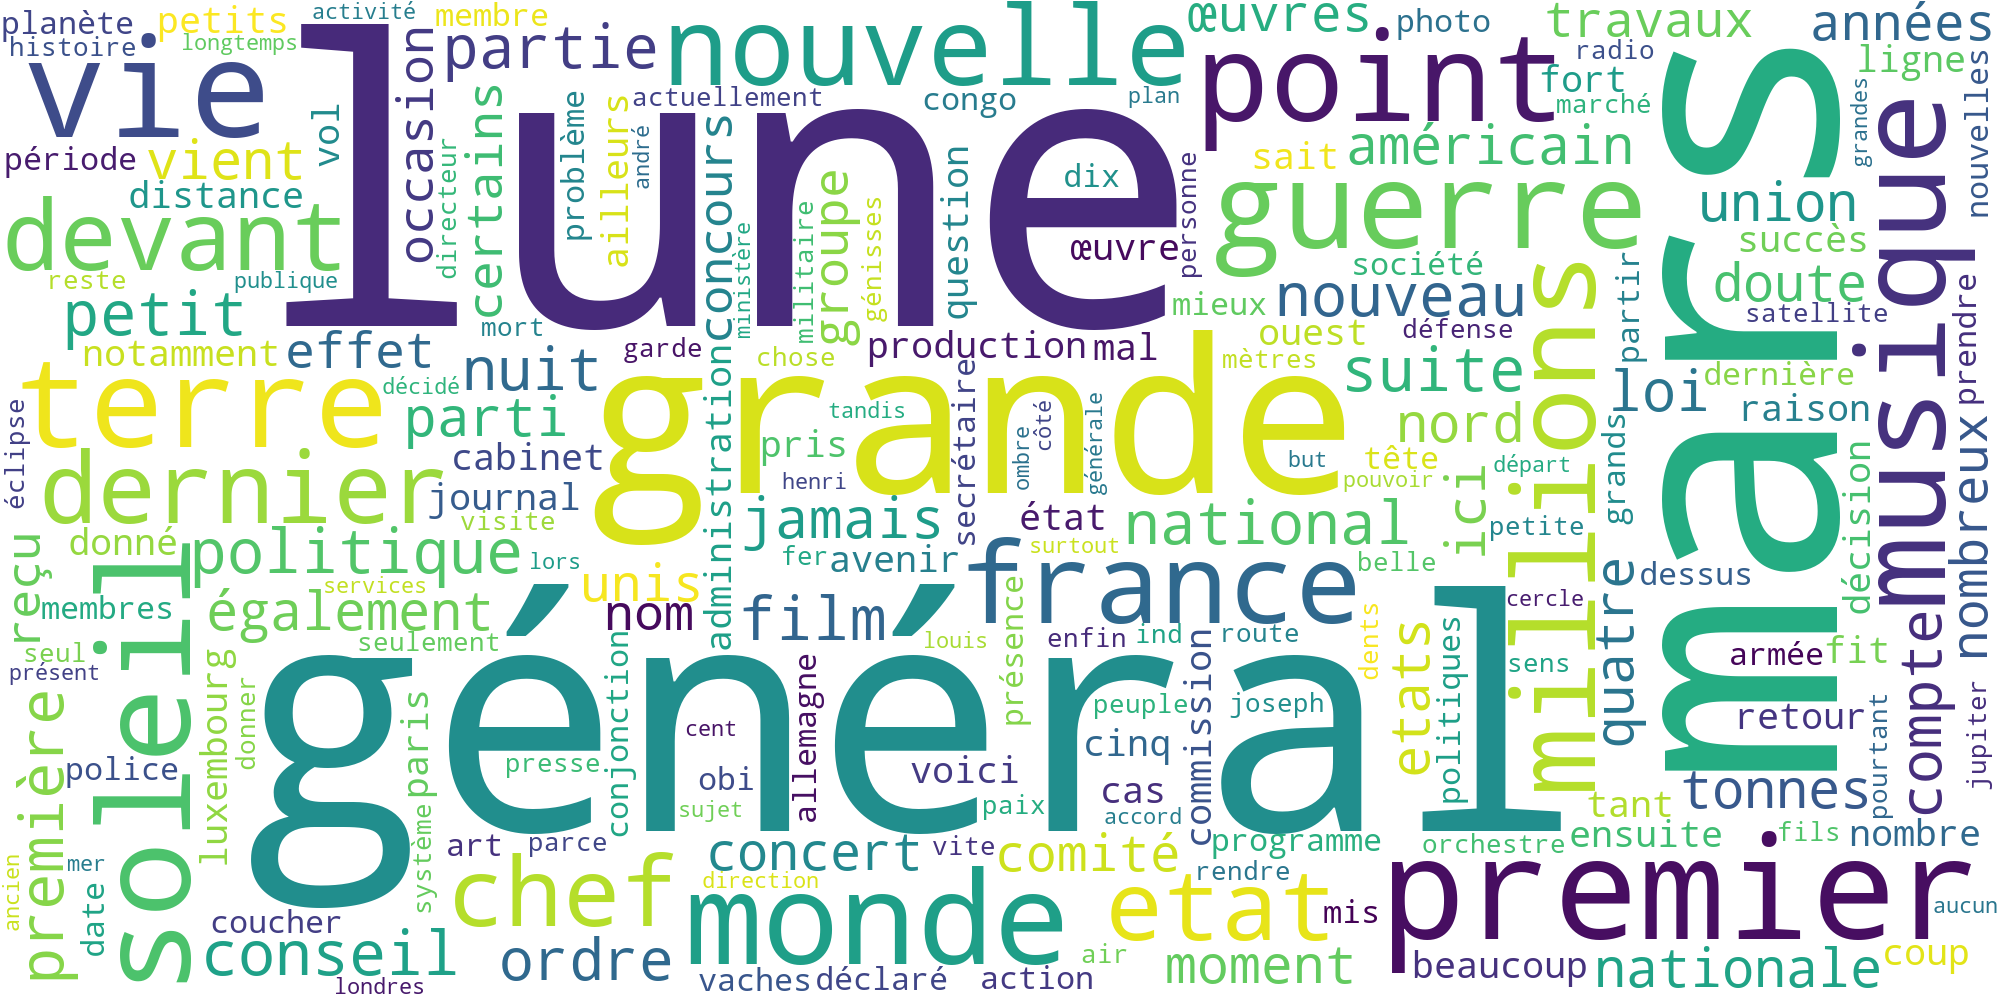

In [186]:
#creating a wc and saving it in temp
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}bis.png"))
Image(filename=os.path.join(temp_path, f"{year}bis.png"))

WORDCLOUD ON ALL THE FILES

In [134]:
#choosing file
data_path = '../tp4/all'
txts = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
txts

['allbis_clean.txt',
 'all.txt',
 '.DS_Store',
 'sents.txt',
 'sentsbis.txt',
 'allbisbis_clean.txt',
 'allbis.txt',
 'all_clean.txt']

In [121]:
len(txts)

8

In [122]:
#print file's content
with open(os.path.join(data_path, f'allbis.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"LE DRAPEAU ROUGE Faits Divers accidenta de la rue à Bruxelles. - Urne oolllision est sunrvacme,, mardi soir, -aura io tnam n° 83 et' ratts&ge oofvduit. par la omnioniieur Louis Henrunit, domi- ,.-.£\\_é m de Florenne, 42, à Ixelles, au tjÊmtmt des rues de Savoie et de Lom- bfxnâje» à .fiaant-GiJiles. Le choc a été violent. Hawoaiut a été projeté à terre et ! ; .>eaaé à Im jambe. Des soins lui ont été .v.vxJigués à l'hôpital de l'avenue Molière. î es dégite matériels sont assez élevés. 'URUATiNE S"

In [107]:
#cleaning content
def clean_text(test, folder=None):
    if folder is None:
        input_path = f"{test}.txt"
        output_path = f"{test}_clean.txt"
    else:
        input_path = f"{folder}/{test}.txt"
        output_path = f"{folder}/{test}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [108]:
clean_text("allbis", folder=data_path)

'Output has been written in ../tp4/all/allbis_clean.txt!'

In [109]:
#check result
with open(os.path.join(data_path, f'allbis_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'DRAPEAU ROUGE FAITS DIVERS ACCIDENTA URNE OOLLLISION SUNRVACME TNAM RATTS OOFVDUIT OMNIONIIEUR LOUIS HENRUNIT DOMI FLORENNE TJÊMTMT RUES SAVOIE LOM BFXNÂJE FIAANT GIJILES CHOC VIOLENT HAWOAIUT PROJETÉ TERRE EAAÉ JAMBE SOINS VXJIGUÉS HÔPITAL MOLIÈRE DÉGITE MATÉRIELS ÉLEVÉS URUATINE CBOGIE MYSTÉRLRASE AFFAIRE BEERNEM OONCERUE AFFAIRE MYSTÉRIEUSE BEEMAEM CHAMBRE MISES TIAN COUR APPEL URA ATATUER FIA FCUR SUITES INTERVENTION PROCUREUR GÉNÉRAL CONCERNANT MANDATS AAFJRÊT CHARGE OSCAR LÈVES EUGÈNE SCHE'

In [110]:
#get most common words (x10)
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('LUNE', 5922), ('TERRE', 4590), ('PREMIER', 4140), ('PRÉSIDENT', 3920), ('MINISTRE', 3899), ('GRANDE', 3652), ('GOUVERNEMENT', 3515), ('GÉNÉRAL', 3293), ('PARIS', 3255), ('POINT', 3125), ('PREMIÈRE', 2973), ('MARS', 2885), ('MONDE', 2880), ('VIE', 2792), ('SOLEIL', 2763), ('FRANCE', 2701), ('DERNIER', 2648), ('HEURE', 2647), ('MOMENT', 2575), ('QUATRE', 2575)]


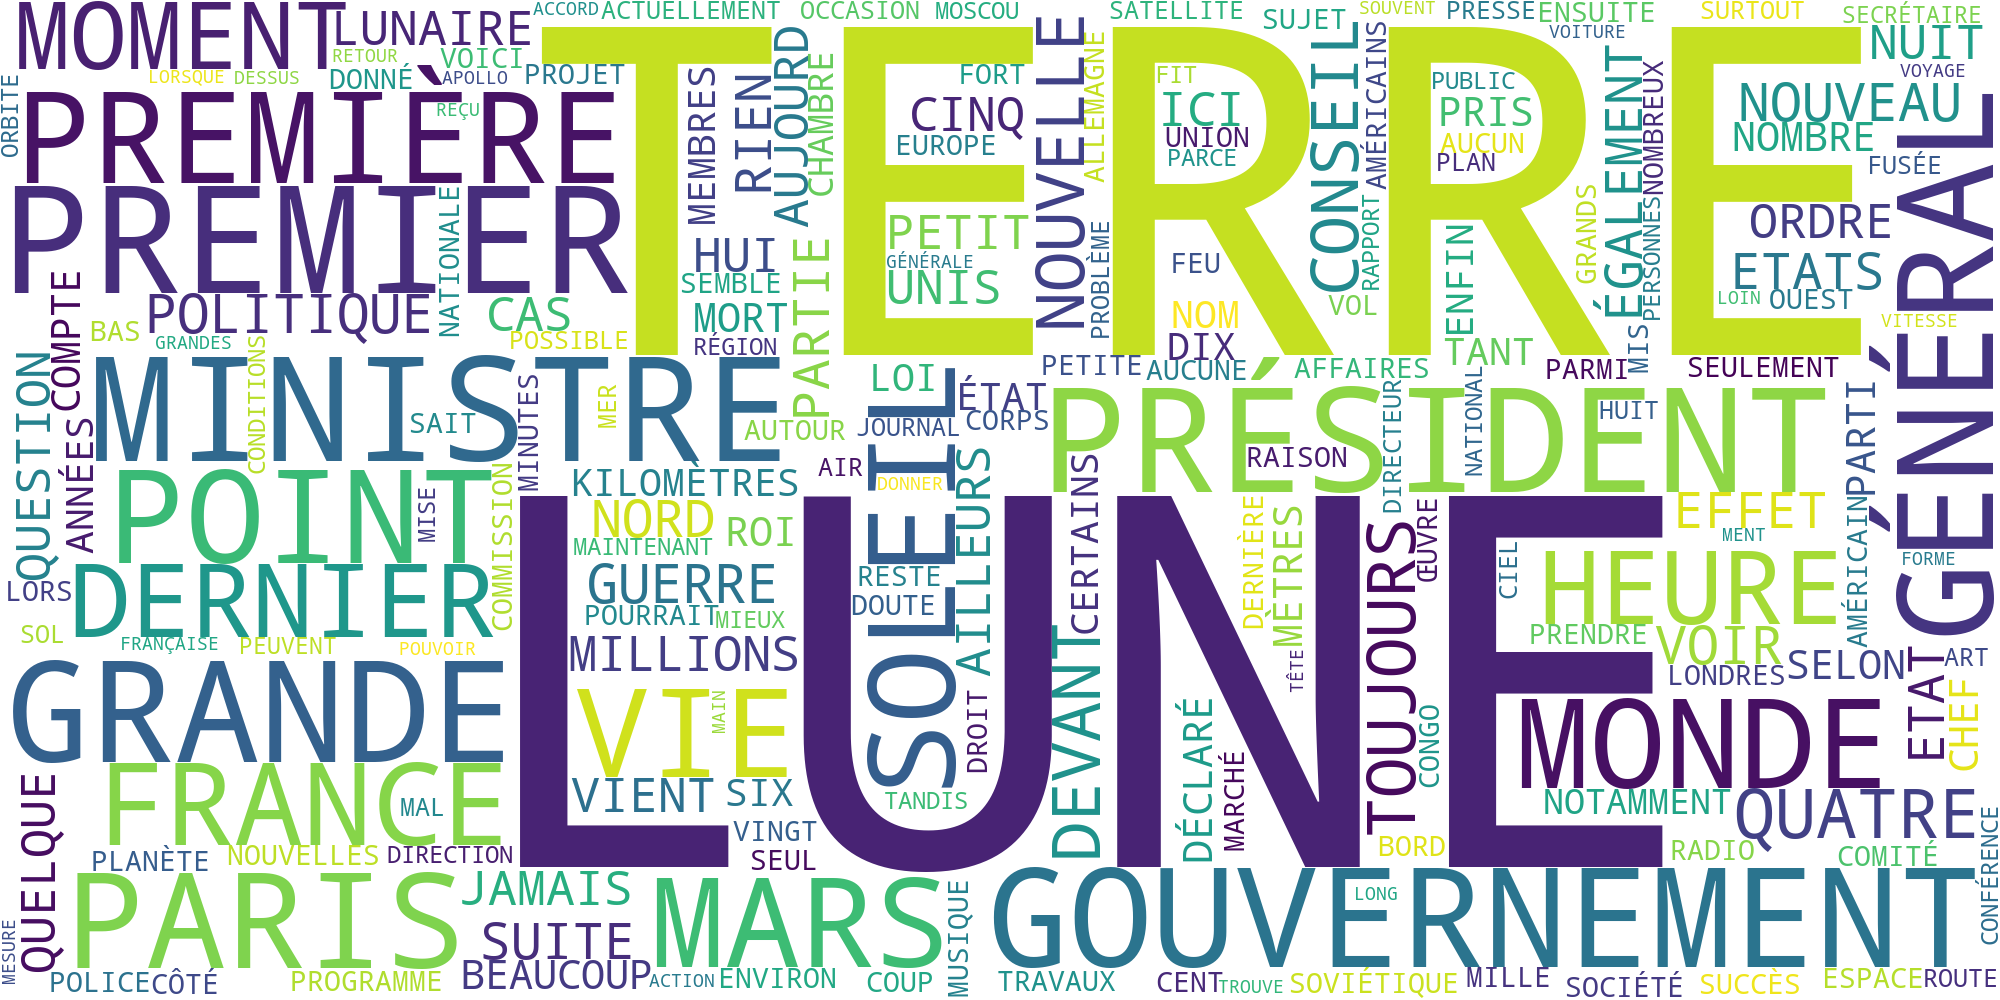

In [111]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"allbis.png"))
Image(filename=os.path.join(temp_path, f"allbis.png"))

CLUSTERING

In [2]:
data_path = "../tp4/data_bis/"

In [3]:
DECADE = '1966'

In [4]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [5]:
texts = [open(data_path + f).read() for f in files]

In [6]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [7]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [8]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [9]:
# Détail de la matrice
tfidf_vectors

<448x3557 sparse matrix of type '<class 'numpy.float64'>'
	with 323440 stored elements in Compressed Sparse Row format>

In [10]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

tre           0.172032
da            0.148961
tique         0.126917
fr            0.125523
professeur    0.124637
                ...   
faisant       0.000000
fallait       0.000000
fallu         0.000000
fallut        0.000000
♦             0.000000
Length: 3557, dtype: float64

In [11]:
tfidf_array = tfidf_vectors.toarray()

In [20]:
N_CLUSTERS = 3

In [21]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [22]:
clusters = km_model.fit_predict(tfidf_vectors)

In [23]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [24]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-08-21_01-00004.txt',
     'KB_JB838_1960-12-20_01-00004.txt',
     'KB_JB838_1962-07-10_01-00004.txt',
     'KB_JB838_1963-05-16_01-00004.txt',
     'KB_JB838_1964-07-26_01-00004.txt',
     'KB_JB838_1965-02-18_01-00004.txt',
     'KB_JB838_1965-02-21_01-00004.txt',
     'KB_JB838_1965-04-14_01-00004.txt',
     'KB_JB838_1965-07-17_01-00004.txt',
     'KB_JB838_1965-07-18_01-00004.txt',
     'KB_JB838_1966-04-13_01-00004.txt',
     'KB_JB838_1966-05-04_01-00004.txt',
     'KB_JB838_1967-04-26_01-00004.txt',
     'KB_JB838_1968-02-01_01-00004.txt',
     'KB_JB838_1968-08-17_01-00004.txt',
     'KB_JB838_1968-09-20_01-00004.txt',
     'KB_JB838_1968-10-11_01-00004.txt',
     'KB_JB838_1968-11-17_01-00004.txt',
     'KB_JB838_1969-01-19_01-00004.txt',
     'KB_JB838_1969-02-07_01-00004.txt',
     'KB_JB838_1969-02-27_01-00005.txt',
     'KB_JB838_1969-03-09_01-00004.txt',
     'KB_JB838_1969-03-11_01-00004.txt',
     'KB_JB838_1969-05-28_01-00004.txt',
     'KB_JB838_1

In [25]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [26]:
reduced_vectors[:10]

array([[-0.00071958, -0.18324494],
       [ 0.03221658, -0.14544657],
       [-0.02803397, -0.14512387],
       [ 0.16997416, -0.04011809],
       [ 0.00028161, -0.14959443],
       [-0.03855971, -0.16293401],
       [ 0.08646267, -0.0420379 ],
       [ 0.03270796, -0.09285518],
       [-0.0350322 , -0.12996955],
       [-0.0439747 , -0.16354053]])

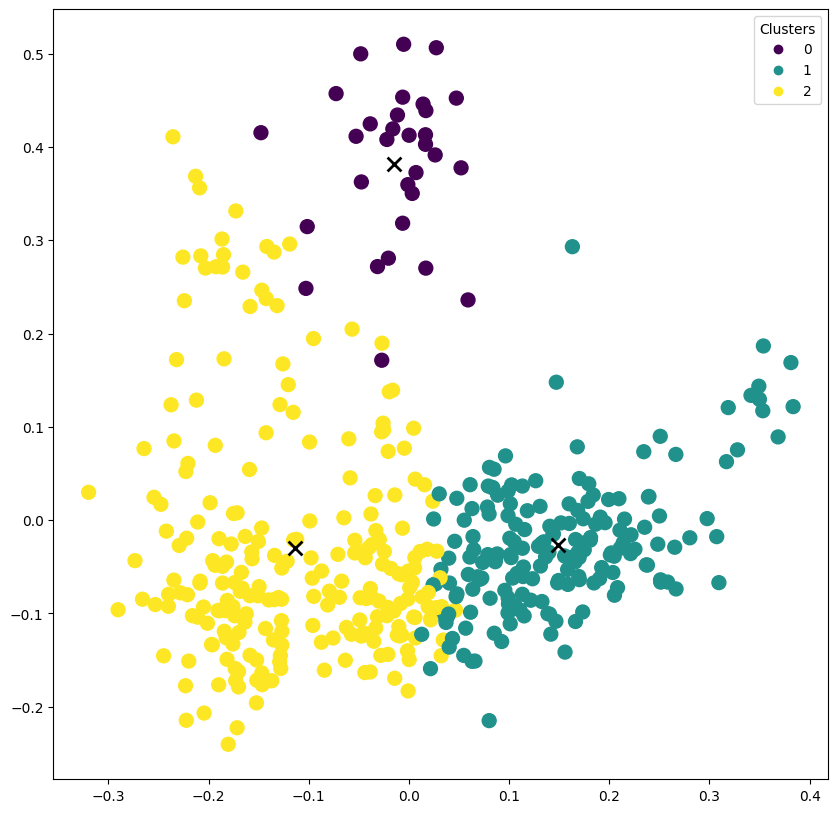

In [27]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [37]:
infile = "../tp4/all/allbis.txt"
outfile = "../tp4/all/sentsbis.txt"

In [41]:
LIMIT = None

In [42]:
with open(outfile, 'w', encoding="utf-8") as output:
    with open(infile, encoding="utf-8", errors="backslashreplace") as f:
        content = f.readlines()
        content = content[:LIMIT] if LIMIT is not None else content
        n_lines = len(content)
        for i, line in enumerate(content):
            if i % 100 == 0:
                print(f'processing line {i}/{n_lines}')
            sentences = sent_tokenize(line)
            for sent in sentences:
                output.write(sent + "\n")
print("Done")

processing line 0/1
Done


WORD_EMBEDDINGS W/ WORD2VEC

CHARGING & TREATING THE CORPUS'S SENTENCES

In [45]:
#creating an object to stream lines to save RAM
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [46]:
infile = f"../tp4/all/sentsbis.txt"
sentences = MySentences(infile)

In [47]:
#detecting bi-grams
bigram_phrases = Phrases(sentences)

In [48]:
type(bigram_phrases.vocab)

dict

In [49]:
len(bigram_phrases.vocab.keys())

2222054

In [50]:
key_ = list(bigram_phrases.vocab.keys())[92267]
print(key_)

teristiques_sortt


In [51]:
bigram_phrases.vocab[key_]

1

In [52]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [53]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [54]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [55]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [56]:
print(corpus[:100])

[['le', 'drapeau_rouge', 'faits_divers', 'accidenta', 'de', 'la', 'rue', 'a', 'bruxelles', '.'], ['-', 'urne', 'oolllision', 'est', 'sunrvacme', ',,', 'mardi_soir', ',', '-', 'aura', 'io', 'tnam', 'n_deg', '83', 'et', "'", 'ratts', '&', 'ge', 'oofvduit', '.'], ['par', 'la', 'omnioniieur', 'louis', 'henrunit', ',', 'domi', '-', ',.-.PS\\', '_e', 'm', 'de', 'florenne', ',', '42', ',', 'a', 'ixelles', ',', 'au', 'tjemtmt', 'des_rues', 'de', 'savoie', 'et', 'de', 'lom', '-', 'bfxnaje', '>>', 'a', '.', 'fiaant', '-', 'gijiles', '.'], ['le', 'choc', 'a', 'ete', 'violent', '.'], ['hawoaiut', 'a', 'ete_projete', 'a', 'terre', 'et', '!'], [';', '.>', 'eaae', 'a', 'im', 'jambe', '.'], ['des', 'soins', 'lui', 'ont_ete', '.', 'v', '.', 'vxjigues', 'a', 'l', "'", 'hopital', 'de', 'l', "'", 'avenue', 'moliere', '.'], ['i', 'es', 'degite', 'materiels_sont', 'assez', 'eleves', '.'], ["'", 'uruatine', 'sevr1n', '^', '#', 'c', '#', 'cbogie', 'matin', 'la', 'mysterlrase', 'affaire', 'de', 'beernem', '.']

In [57]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: user 24.1 s, sys: 302 ms, total: 24.4 s
Wall time: 9.26 s


In [59]:
outfile = f"../tp4/newspapersbis.model"
model.save(outfile)

In [60]:
model = Word2Vec.load("../tp4/newspapersbis.model")

In [61]:
model.wv["lune"]

array([-0.17454879, -2.992534  , -2.4126031 , -0.4281217 , -1.1350971 ,
       -0.46455574, -1.5069935 , -3.077215  , -0.57414514,  3.1827784 ,
       -1.0525217 , -2.1853383 ,  0.708589  ,  0.6783194 ,  2.3809474 ,
        0.73022926, -1.2473558 ,  0.50487655, -0.4670365 ,  0.871313  ,
       -1.5146986 ,  0.29010147,  3.2820954 ,  3.1211379 ,  0.6345892 ,
        1.4897403 , -1.5256532 , -4.341936  ,  2.2351778 ,  0.17702469,
       -2.1376672 ,  0.13689767], dtype=float32)

In [62]:
model.wv.similarity("lune", "cliche")

0.49745157

In [66]:
model.wv.most_similar("cliche", topn=20)

[('vaisseau_cosmique', 0.9197167754173279),
 ('lanceur', 0.8921513557434082),
 ('score', 0.8829048871994019),
 ('drapeau_americain', 0.8824481964111328),
 ('reportage', 0.8774654269218445),
 ('dernier_etage', 0.869572103023529),
 ('satellite_artificiel', 0.8688925504684448),
 ('compartiment', 0.8673112988471985),
 ('modele', 0.866240918636322),
 ('fascicule', 0.8661016821861267),
 ('reacteur', 0.86603844165802),
 ('flanc', 0.8659411668777466),
 ('premier_satellite', 0.8657005429267883),
 ('poeme', 0.8653218150138855),
 ('yacht', 0.8646447062492371),
 ('timbre', 0.8641596436500549),
 ('vaisseau', 0.8635419607162476),
 ('rectangle', 0.8630876541137695),
 ('propulseur', 0.8627014756202698),
 ('panneau', 0.8625987768173218)]